In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import descriptors.preprocessing as pp
import descriptors.dft_featurisation as dft_ft
from analysis import analysis_train_set_size, random_split, stratified_split 

In [2]:
df = pd.read_csv("data/NiCOlit.csv")

df_dft = pp.preprocess(df, remove_small_doi=False)

In [4]:
X_dft, y_dft, DOI_dft, mechanisms_dft, origins_dft, sub_dft, lig_dft = dft_ft.process_dataframe_dft(df_dft, data_path="data/utils/", origin=False)

In [9]:
# Random Split
values, baseline_values, model_values, stratification_values, additional_stratification_values = random_split(X_dft, y_dft, origins_dft, mechanisms_dft, n_iterations=10)
display_df =  pd.DataFrame(zip(values, baseline_values, model_values, stratification_values, additional_stratification_values), 
                           columns = ['Yields', 'Baseline', 'Predicted Yields', 'Origin', 'Coupling Partner'])

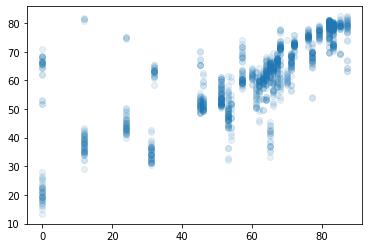

In [15]:
plt.scatter(values, model_values, alpha=0.1)
plt.show()

In [11]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print(r2_score(values, model_values))
print(mean_absolute_error(values, model_values))
print(mean_squared_error(values, model_values)**0.5)

0.5611786219650394
16.075913418667774
22.091196765708577


In [13]:
# Restricted CP and Substrates performances
n_iterations = 100
r2_sub = []
length_sub = []
for sub in np.unique(sub_dft):
    indexes = np.where(sub_dft==sub)[0]
    values, baseline_values, model_values, stratification_values, additional_stratification_values = random_split(X_dft[indexes, :], y_dft[indexes], origins_dft[indexes], 
                                                                                                                  sub_dft[indexes], n_iterations=n_iterations)
    print(sub, len(indexes), round(r2_score(values, model_values), 3))
    r2_sub.append(round(r2_score(values, model_values), 3))
    length_sub.append(len(indexes))

OAc 72 0.405
OC(=O)N 279 0.366
OC(=O)O 85 0.67
OCH3 574 0.582
OCOC 17 -0.381
OPh 3 -1.338
OPiv 417 0.575
OSi(C)(C)C 23 -0.272
Otriazine 54 0.392
others 8 0.001


## Results with DOI <20 removed
OAc 72 0.404

OC(=O)N 215 0.348

OC(=O)O 82 0.641

OCH3 546 0.569

OCOC 17 -0.367

OPh 3 -1.304

OPiv 394 0.555

OSi(C)(C)C 23 -0.284

Otriazine 54 0.391

In [14]:
r2_cp = []
length_cp = []
for sub in np.unique(mechanisms_dft):
    indexes = np.where(mechanisms_dft==sub)[0]
    values, baseline_values, model_values, stratification_values, additional_stratification_values = random_split(X_dft[indexes, :], y_dft[indexes], origins_dft[indexes], 
                                                                                                                  mechanisms_dft[indexes], n_iterations=n_iterations)
    print(sub, len(indexes), round(r2_score(values, model_values), 3))
    r2_cp.append(round(r2_score(values, model_values),3))
    length_cp.append(len(indexes))

Al 53 0.182
B 534 0.507
C-H 274 0.554
CO2 87 0.497
Li 52 0.045
NCO 57 0.295
NH 27 -0.048
P 6 0.097
RMgX 321 0.482
Si 53 0.59
Zn 68 0.571


## Results with DOI <20 removed
Al 53 0.175

B 472 0.447

C-H 271 0.557

CO2 87 0.497

Li 52 0.044

NCO 57 0.29

NH 27 -0.031

RMgX 266 0.476

Si 53 0.591

Zn 68 0.573